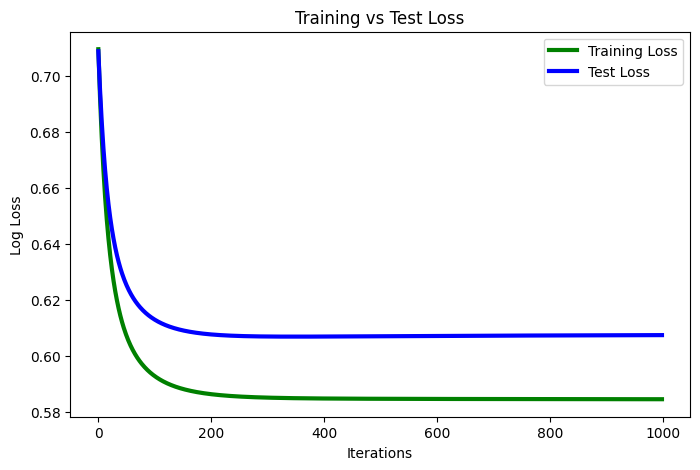

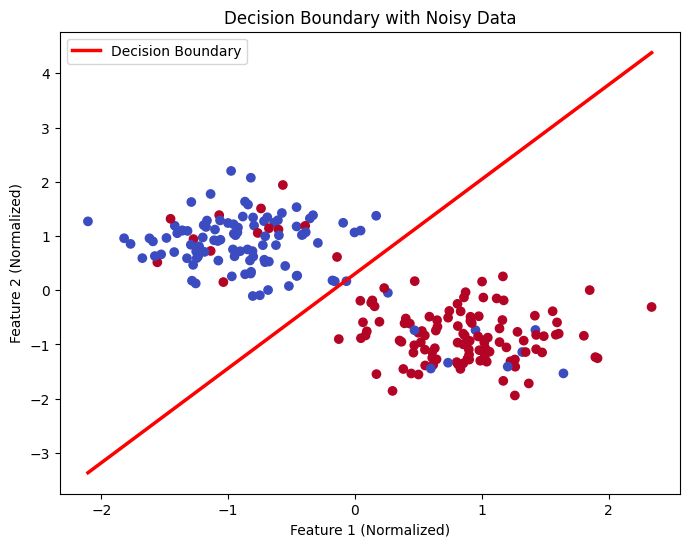

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss(y, h):
    return np.mean(np.log(1 + np.exp(-y * h)))




def generate_data(n_samples=300, noise_ratio=0.1):

    X, y = make_blobs(n_samples=n_samples, centers=2, n_features=2, cluster_std=2.0, random_state=42)

    y = 2 * y - 1


    num_noisy_samples = int(noise_ratio * n_samples)
    noisy_indices = np.random.choice(n_samples, num_noisy_samples, replace=False)
    y[noisy_indices] = -y[noisy_indices]

    return X, y






def split_data(X, y, test_size=0.2):
    indices = np.random.permutation(len(X))
    split_idx = int(len(X) * (1 - test_size))
    return X[indices[:split_idx]], y[indices[:split_idx]], X[indices[split_idx:]], y[indices[split_idx:]]




def logistic_regression(X_train, y_train, X_test, y_test, lr=0.1, iterations=1000):
    m, n = X_train.shape
    weights = np.zeros(n + 1)
    X_train_bias = np.c_[np.ones(m), X_train]
    X_test_bias = np.c_[np.ones(X_test.shape[0]), X_test]

    train_errors, test_errors = [], []


    for _ in range(iterations):
        z = np.dot(X_train_bias, weights)
        h = sigmoid(z)
        gradient = np.dot(X_train_bias.T,(h -(y_train + 1) /2))/m
        weights -= lr*gradient


        train_errors.append(compute_loss(y_train, h))
        test_errors.append(compute_loss(y_test, sigmoid(np.dot(X_test_bias, weights))))

    return weights, train_errors, test_errors





def plot_loss(train_errors, test_errors):
    plt.figure(figsize=(8, 5))
    plt.plot(train_errors, label="Training Loss", color="green", linewidth=3)
    plt.plot(test_errors, label="Test Loss", color="blue", linewidth=3)
    plt.xlabel("Iterations")
    plt.ylabel("Log Loss")
    plt.title("Training vs Test Loss")
    plt.legend()
    plt.show()






def plot_decision_boundary(X_train, y_train, weights):
    x_values = np.linspace(min(X_train[:, 0]), max(X_train[:, 0]), 100)
    y_values = -(weights[0] + weights[1] * x_values) / weights[2]
    plt.figure(figsize=(8, 6))
    plt.plot(x_values, y_values, label='Decision Boundary', color="red", linewidth=2.5)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="coolwarm")
    plt.xlabel("Feature 1 (Normalized)")
    plt.ylabel("Feature 2 (Normalized)")
    plt.title("Decision Boundary with Noisy Data")
    plt.legend()
    plt.show()


X, y = generate_data(noise_ratio=0.1)
X_train, y_train, X_test, y_test = split_data(X, y, test_size=0.25)


X_train_mean, X_train_std = X_train.mean(axis=0), X_train.std(axis=0)
X_train = (X_train - X_train_mean) / X_train_std
X_test = (X_test - X_train_mean) / X_train_std


weights, train_errors, test_errors = logistic_regression(X_train, y_train, X_test, y_test, lr=0.1, iterations=1000)


plot_loss(train_errors, test_errors)
print()
print()
plot_decision_boundary(X_train, y_train, weights)
